In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
cfar100 = tf.keras.datasets.cifar100
(X_train, Y_train), (X_test, Y_test) = cfar100.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)

In [8]:
model = tf.keras.models.Sequential([
         tf.keras.layers.Dense(64, input_dim = 3072, activation='relu'),
         tf.keras.layers.Dense(128, activation='relu'),
         tf.keras.layers.Dense(100, activation='softmax')                          
])
     

In [9]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [10]:
model_output = model.fit(X_train, Y_train, epochs = 10)
model.evaluate(X_test, Y_test)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 4.3415 - accuracy: 0.0304
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 4.2074 - accuracy: 0.0441
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 4.1713 - accuracy: 0.0464
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 4.1503 - accuracy: 0.0486
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 4.1404 - accuracy: 0.0519
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 4.1251 - accuracy: 0.0544
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 4.1226 - accuracy: 0.0535
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 4.0906 - accuracy: 0.0592
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 4.0312 - accuracy: 0.0684
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 4.0707 

[4.070699691772461, 0.06759999692440033]

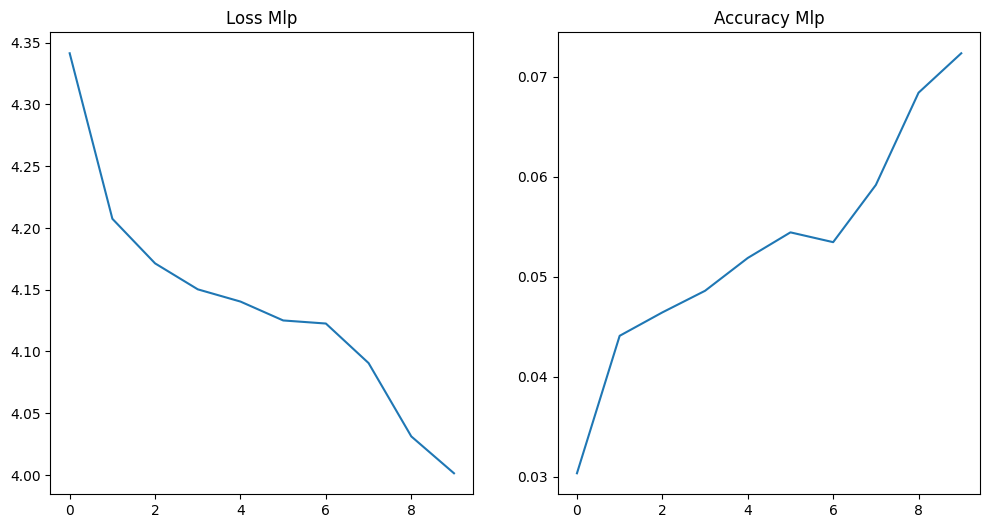

In [11]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(model_output.history['loss'])
ax1.set_title("Loss Mlp")
ax2.plot(model_output.history['accuracy'])
ax2.set_title("Accuracy Mlp")
plt.show()